In [19]:
import readdata
from text_vectorizer import CV
from text_vectorizer import TFIDF
from text_vectorizer import word2vec
from text_vectorizer import outlierDection
from OutlierDetectRemove import removeOutliers
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
import numpy as np
import sys

# Usage: 
# 1. python lstm.py cv
# 2. python lstm.py tfidf
# 3. python lstm.py word2vec

# cross-validation 3
# number of estimators: 200, 400, 800
# max_depth: 1, 5, 9
# min_samples_leaf: 2, 4
# min_samples_split: 5, 10

def getRemovedVals(X,Y = None,Ftype = "",isTest = False):

    X = np.array(X)
    index,_ = outlierDection(X,Ftype)
    if not isTest:
        Y = np.array(Y)
        Xrem,Yrem = removeOutliers(index,X,Y,Ftype)
        return Xrem,Yrem

    else:
        Xrem = removeOutliers(index,X,Y,Ftype)
        return Xrem


def evaluate(pred, truth):
    print('Mean Absolute Error:', metrics.mean_absolute_error(truth, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(truth, pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(truth, pred)))


dfTrain = readdata.read_clean_data(readdata.TRAINFILEPATH,nolabel = False)
dfTest = readdata.read_clean_data(readdata.TESTFILEPATH,nolabel = True)

X_train = dfTrain['text'].to_numpy()
Y_train = dfTrain['label'].to_numpy()
X_test = dfTest['text'].to_numpy() # unlabelled


# X_train, X_test, _ = CV(X_train, X_test) # train shape: (17973, 141221)
# X_train,Y_train = getRemovedVals(X = X_train,Y = Y_train,Ftype = "CV_Train",isTest = False)
# X_test = getRemovedVals(X = X_test,Y = None,Ftype = "CV_Test",isTest = True)


# X_train, X_test, _ = TFIDF(X_train, X_test) # shape: (17973, 141221)
# X_train,Y_train = getRemovedVals(X = X_train,Y = Y_train,Ftype = "TFIDF_Train",isTest = False)
# X_test = getRemovedVals(X = X_test,Y = None,Ftype = "TFIDF_Test",isTest = True)


X_train, X_test = word2vec(X_train, X_test)
X_train,Y_train = getRemovedVals(X = X_train,Y = Y_train,Ftype = "W2V_Train",isTest = False)
X_test = getRemovedVals(X = X_test,Y = None,Ftype = "W2V_Test",isTest = True)


# below are the hyperparameters to be grid-searched on
n_estimators = [200, 400, 800]
max_depth = [1, 5, 9]
min_samples_leaf = [2, 4]
min_samples_split = [5, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                min_samples_split=min_samples_split)

model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.885997 using {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}


In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

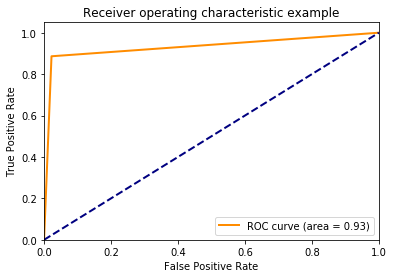

In [22]:
graph_roc(grid_result)

In [17]:
print(roc_auc)

0.9320271027795818


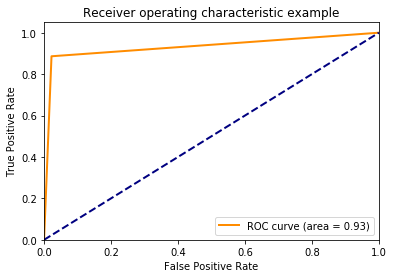

In [21]:
def graph_roc(grid_result):
    y_score = grid_result.predict(X_train)

    fpr, tpr, _ = roc_curve(Y_train, y_score)
    roc_auc = auc(fpr, tpr)

    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from text_vectorizer import word2vec
import readdata
from text_vectorizer import CV
from text_vectorizer import TFIDF
from text_vectorizer import word2vec
from text_vectorizer import outlierDection
from OutlierDetectRemove import removeOutliers
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
import numpy as np
import sys

# def graph_roc2(classifier,model_parameters,ftype):
dfTrain = readdata.read_clean_data(readdata.TRAINFILEPATH,nolabel = False)
dfTest = readdata.read_clean_data(readdata.TESTFILEPATH,nolabel = True)

X_train = dfTrain['text'].to_numpy()
Y_train = dfTrain['label'].to_numpy()
X_test = dfTest['text'].to_numpy() # unlabelled

    
X_train, X_test = ftype(X_train, X_test)
X_train,Y_train = getRemovedVals(X = X_train,Y = Y_train,Ftype = "W2V_Train",isTest = False)
X_test = getRemovedVals(X = X_test,Y = None,Ftype = "W2V_Test",isTest = True)


c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


(1798,)
(17973,)
the percentage of outliers in  W2V_Train  is:  10.003894730985367 %
(16175, 100)  is shape of X for  W2V_Train after removing outliers
(16175,)  is shape of Y for  W2V_Train  after removing outlier


c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


(450,)
(4494,)
the percentage of outliers in  W2V_Test  is:  10.013351134846461 %
(4044, 100)  is shape of X for  W2V_Test after removing outliers


In [ ]:
classifier = RandomForestClassifier
model_parameters = {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}
ftype = word2vec
model = classifier(**model_parameters)
model.fit(X_train, Y_train)
y_score = model.predict(X_train)

fpr, tpr, _ = roc_curve(Y_train, y_score)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
graph_roc2(RandomForestClassifier, {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}, word2vec)

UnboundLocalError: local variable 'X_train' referenced before assignment